In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from typing import List, Tuple, Union
from dataclasses import dataclass
from scipy.spatial import distance

In [6]:
@dataclass
class Source:
    loc: List[float]
    intensity : float

class World(object):

    def __init__(self):
        self.sources: List[Source] = []

    def add_source(self, source: Source):
        self.sources.append(source)

    def visualize_world(
        self,
        figsize: Tuple[float, float] = (8, 8),
        plotsize: float = 10,
    ) -> plt.Axes:
        
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111)
        ax.plot(
            [plotsize, plotsize, -plotsize, -plotsize],
            [plotsize, -plotsize, plotsize, -plotsize],
            "wd",
        )
        ax.plot([0],[0],"rd")
        ax.set_aspect("equal")
        ax.set_title("X (horizontal, Y(vertical), Origin(red dot))")
        x = []
        y = []
        c = []
        for src in self.sources:
            x.append(src.loc[0])
            y.append(src.loc[1])
            c.append(src.intensity)

        sc = ax.scatter(x,y,s=100, c=c, cmap=plt.cm.jet)
        _ = fig.colorbar(sc, orientation="horizontal")

        return ax

In [20]:
column_names = ['x', 'y', 'z', 'intensity', 'type']
df = pd.read_csv("../data/test/result0_test.csv", names=column_names)
df_source = df[df['type'] == 'source_data']
df_detector = df[df['type'] != 'source_data']
print(df_source)
print(df_detector)

      x    y    z    intensity         type
0  10.5  7.5  0.0  7963.110840  source_data
1   5.5  2.5  0.0  9855.455078  source_data
2   7.5  2.5  0.0  9072.014648  source_data
3   7.5  9.5  0.0  7379.597656  source_data
4   2.5  4.5  0.0  6296.469238  source_data
5   7.5  5.5  0.0  8247.190430  source_data
6   9.5  5.5  0.0  9841.912109  source_data
7  13.5  3.5  0.0  7179.616211  source_data
8   8.5  0.5  0.0  9441.282227  source_data
9   6.5  4.5  0.0  7127.908203  source_data
        x    y    z    intensity type
10    0.5  0.5  0.5  1455.600952  NaN
11    1.5  0.5  0.5  1857.440430  NaN
12    2.5  0.5  0.5  2414.474121  NaN
13    3.5  0.5  0.5  3247.087646  NaN
14    4.5  0.5  0.5  4497.229492  NaN
..    ...  ...  ...          ...  ...
145   9.5  9.5  0.5  5132.606445  NaN
146  10.5  9.5  0.5  4369.873535  NaN
147  11.5  9.5  0.5  3451.400635  NaN
148  12.5  9.5  0.5  2526.160400  NaN
149  13.5  9.5  0.5  1886.992065  NaN

[140 rows x 5 columns]


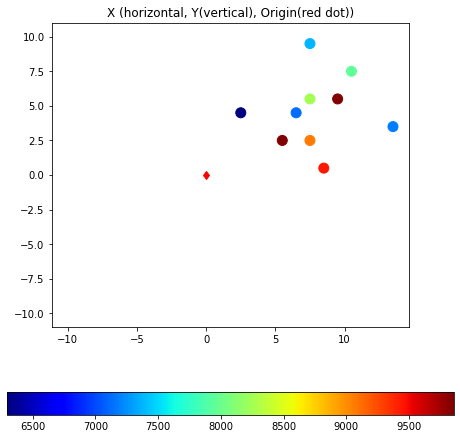

In [21]:
world = World()
for index, row in df_source.iterrows():
    world.add_source(Source(loc=[row['x'],row['y'],row['z']], intensity=row['intensity']))

ax = world.visualize_world()

[[ 1455.60095215  1857.44042969  2414.47412109  3247.08764648
   4497.22949219  5914.20263672  7397.14550781 12497.37011719
  41847.35546875 10719.25585938  4795.16455078  3263.69897461
   2637.74536133  2247.8828125 ]
 [ 1726.05029297  2295.60473633  3093.765625    4465.99853516
   7686.15527344 12629.66503906 12498.7109375  15672.96972656
  14828.6875      8683.50195312  5186.55761719  3907.21044922
   3541.9909668   3326.89477539]
 [ 2084.64648438  3004.63110352  4149.92236328  5772.65039062
  12041.80371094 45521.07421875 20101.13867188 44187.66796875
  14022.37304688  7740.19482422  5514.32324219  4713.66015625
   5605.77539062  7545.35839844]
 [ 2543.3659668   4629.82714844  7711.85058594  7159.32324219
   9558.97753906 15885.765625   18096.59179688 17314.25195312
  11862.1640625   8443.34765625  6409.16064453  5548.33154297
   8451.34179688 30690.4296875 ]
 [ 2801.33959961  6806.62695312 27683.45507812  8808.06933594
   7671.61181641 12911.77734375 38335.49609375 19221.95117188


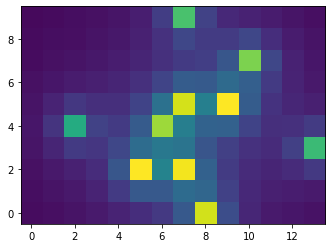

In [24]:
cnts = df_detector['intensity'].values
x_ = 14
y_ = 10
viz = cnts.reshape(y_, x_)
print(viz)
plt.imshow(viz, vmin=0, vmax=np.percentile(cnts, 99))
plt.gca().invert_yaxis()